In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
gestureNameDict, gestureSignDict = {}, {}
gestureNameDict.update({0 : "down gesture", 1 : "palm gesture", 2 : "I gesture", 3 : "fist gesture",})
gestureNameDict.update({4 : "fist-moved gesture", 5 : "thumb gesture", 6 : "index gesture"})
gestureNameDict.update({7 : "ok gesture", 8 : "palm-moved gesture", 9 : "c gesture"})

imgSize_x, imgSize_y = 20, 20
X, Y= [], []
dataDir = "D:\pythonPrograms\machineLearning\miniproject\Input"

In [3]:
print("Extracting images for dataset\n")
for subject in range(1) : 
    print("Extracting image data of subject :", subject)
    path1 = dataDir + "\\0" + str(subject)

    for gesture in os.listdir(path1) :
        temp = int(gesture.split("_")[0][1]) 
        gestureName = gestureNameDict[temp]
        print("      Extracted subject : " + str(subject) + "'s ", gestureName)
        path2 = path1 + "\\" + gesture

        if subject == 0 :
            if temp == 0 :
                sign = Image.open(path2 + "\\frame_00_10_0001.png").convert("L")
                sign = sign.resize((imgSize_x, imgSize_y))
                gestureSignDict.update({temp: sign})
            else :
                sign = Image.open(path2 + "\\frame_00_0" + str(temp) + "_0001.png").convert("L")
                sign = sign.resize((imgSize_x, imgSize_y))
                gestureSignDict.update({temp: sign})

        for files in os.listdir(path2) :
            img = Image.open(path2 + "\\" + files).convert("L")
            img = img.resize((imgSize_x, imgSize_y))
            category = files.split("_")[2][1]

            X.append(np.array(img))
            Y.append(int(category))

X = np.array(X, dtype = "float32").reshape(len(X), imgSize_x*imgSize_y)
Y= np.array(Y)
print("\nX dataset shape : ", X.shape)
print("Y dataset shape : ", Y.shape)

Extracting images for dataset

Extracting image data of subject : 0
      Extracted subject : 0's  palm gesture
      Extracted subject : 0's  I gesture
      Extracted subject : 0's  fist gesture
      Extracted subject : 0's  fist-moved gesture
      Extracted subject : 0's  thumb gesture
      Extracted subject : 0's  index gesture
      Extracted subject : 0's  ok gesture
      Extracted subject : 0's  palm-moved gesture
      Extracted subject : 0's  c gesture
      Extracted subject : 0's  down gesture

X dataset shape :  (2000, 400)
Y dataset shape :  (2000,)


In [4]:
for i in range(len(gestureSignDict)) :
    plt.imshow(gestureSignDict[i])
    temp="D:\pythonPrograms\machineLearning\miniproject\Output\\"+str(gestureNameDict[i])
    plt.savefig(temp+"_"+str(i)+".jpg", bbox_inches ='tight')
plt.close()

In [5]:
X = X/255
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 4)
n, m = len(ytrain), len(ytest)
print("xtrain shape :", xtrain.shape, " |  ytrain shape :", ytrain.shape)
print("xtest shape :", xtest.shape, "   |  ytest shape :", ytest.shape)

xtrain shape : (1500, 400)  |  ytrain shape : (1500,)
xtest shape : (500, 400)    |  ytest shape : (500,)


In [6]:
trainClassMatrix = np.zeros([len(ytrain), 10], dtype = "int")
for i in range(len(ytrain)) :
    for j in range(10) :
        if ytrain[i] == j :
            trainClassMatrix[i][j] = int(1)

toCSV = pd.DataFrame(trainClassMatrix)
toCSV.columns = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]
toCSV["G"] = ytrain
toCSV.to_csv("D:\pythonPrograms\machineLearning\miniproject\Output\\trainClassMatrix.csv", index = False)
print("Train class matrix CSV file created")

testClassMatrix = np.zeros([len(ytest), 10], dtype = "int")
for i in range(len(ytest)) :
    for j in range(10) :
        if ytest[i] == j :
            testClassMatrix[i][j] = int(1)

toCSV = pd.DataFrame(testClassMatrix)
toCSV.columns = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]
toCSV["G"] = ytest
toCSV.to_csv("D:\pythonPrograms\machineLearning\miniproject\Output\\testClassMatrix.csv", index = False)
print("Test class matrix CSV file created")

Train class matrix CSV file created
Test class matrix CSV file created


In [7]:
class logisticRegression :
    def __init__(self, learningRate, iterNum) :
        self.learningRate = learningRate
        self.iterNum = iterNum
        self.weights = None
        self.bias = None
        self.costValues = None

    def fit(self, x, y) :
        samplesNum, featuresNum = x.shape
        self.weights = np.zeros(featuresNum)
        self.bias = 0
        self.costValues = []

        for iter in range(self.iterNum) :
            temp = np.dot(x, self.weights) + self.bias
            ypred = self.sigmoid(temp)
            self.costValues.append(self.logLoss(ypred, y))
            weightSlope = (1 / samplesNum) * (np.dot(x.T, (ypred - y)))
            biasSlope = (1 / samplesNum) * (np.sum(ypred - y))
            self.weights -= self.learningRate * weightSlope
            self.bias -= self.learningRate * biasSlope

    def predict(self, x) :
        temp = np.dot(x, self.weights) + self.bias
        ypred = self.sigmoid(temp)
        return ypred

    def costVSiter(self) :
        return self.costValues

    def sigmoid(self, x) :
        return 1 / (1 + np.exp(-x))

    def logLoss(self, ypred, y) :
        return -np.mean(y*np.log(ypred) + (1-y)*np.log(1-ypred))

def accuracy(ypred, y) :
    return np.sum(ypred == y) / len(y)

In [8]:
modelList = []
for classes in range(10) :
    print("Trainng model for class :", classes)
    model = logisticRegression(learningRate = 0.1, iterNum = 1000)
    model.fit(xtrain, np.array(trainClassMatrix[:, classes]))
    modelList.append(model)

Trainng model for class : 0
Trainng model for class : 1
Trainng model for class : 2
Trainng model for class : 3
Trainng model for class : 4
Trainng model for class : 5
Trainng model for class : 6
Trainng model for class : 7
Trainng model for class : 8
Trainng model for class : 9


In [9]:
print("Model's class wise accuracy")
classWisePred = pd.DataFrame(ytest)
classWisePred.columns = ["G"]
for classes in range(10) :
    yHatList = []
    for i in range(len(xtest)) :
        yHat = modelList[classes].predict(xtest[i])
        yHatList.append(1 if yHat > 0.5 else 0)

    classWisePred['c'+str(classes)] = np.array(yHatList)
    print("      Class " + str(classes) + " 's Accuracy : " + str(accuracy(yHatList, testClassMatrix[:, classes])*100))

toCSV = classWisePred
toCSV.to_csv("D:\pythonPrograms\machineLearning\miniproject\Output\\classWisePred.csv", index = False)
print("\nClass wise predicted gesture CSV file created")

Model's class wise accuracy
      Class 0 's Accuracy : 99.0
      Class 1 's Accuracy : 99.6
      Class 2 's Accuracy : 99.8
      Class 3 's Accuracy : 99.6
      Class 4 's Accuracy : 99.6
      Class 5 's Accuracy : 99.8
      Class 6 's Accuracy : 99.0
      Class 7 's Accuracy : 100.0
      Class 8 's Accuracy : 99.6
      Class 9 's Accuracy : 100.0

Class wise predicted gesture CSV file created


In [10]:
predictedAns = []
for i in range(len(xtest)) :
    classWiseHypothesis = []
    for classes in range(10) :
        yHat = modelList[classes].predict(xtest[i])
        classWiseHypothesis.append(yHat)
    
    predict = classWiseHypothesis.index(max(classWiseHypothesis))
    predictedAns.append(predict)

print("Model (using own library) Overall Accuracy : ", accuracy(predictedAns, ytest)*100)
toCSV = pd.DataFrame(ytest)
toCSV.columns = ["G"]
toCSV['gPred'] = np.array(predictedAns)
toCSV.to_csv("D:\pythonPrograms\machineLearning\miniproject\Output\\gesturePred.csv", index = False)
print("Predicted gesture CSV file created")

Model (using own library) Overall Accuracy :  99.6
Predicted gesture CSV file created


In [11]:
modelSklearn = LogisticRegression(max_iter = 10000, solver = "liblinear")
modelSklearn.fit(xtrain, ytrain)
ypredSklearn = modelSklearn.predict(xtest)
print("Accuracy (using sklearn library) :", accuracy(ypredSklearn, ytest)*100)

Accuracy (using sklearn library) : 100.0


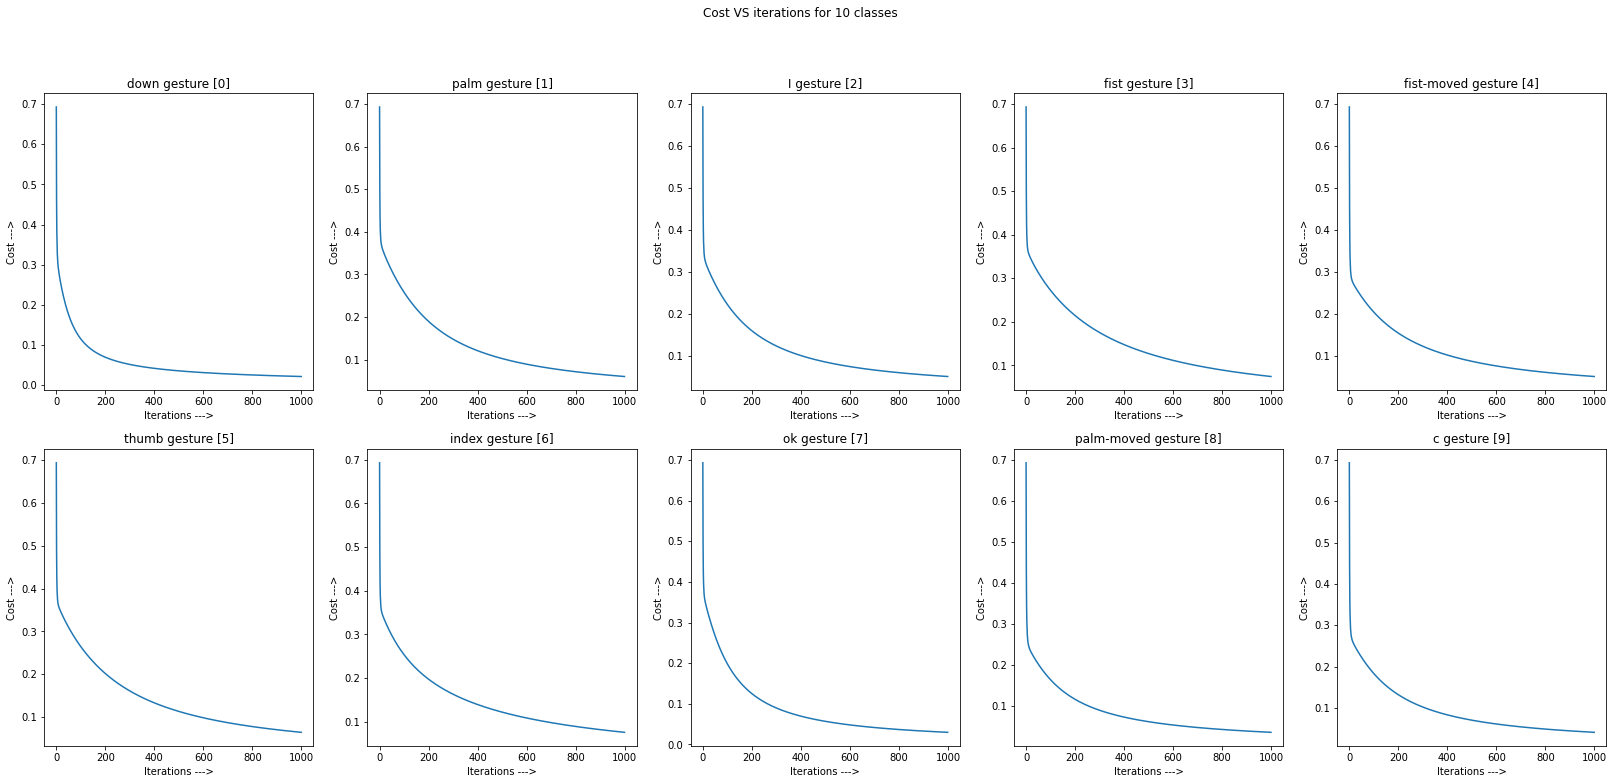

In [12]:
fig, graph = plt.subplots(2, 5, figsize = (28, 12))
temp = 0
for i in range(10) :
    if i < 5 :
        graph[0][i].plot(modelList[temp].costVSiter())
        graph[0][i].set_title(gestureNameDict[temp] + " [" + str(temp) + "]")
        graph[0][i].set_xlabel("Iterations --->")
        graph[0][i].set_ylabel("Cost --->")
    else :
        graph[1][i - 5].plot(modelList[temp].costVSiter())
        graph[1][i - 5].set_title(gestureNameDict[temp] + " [" + str(temp) + "]")
        graph[1][i - 5].set_xlabel("Iterations --->")
        graph[1][i - 5].set_ylabel("Cost --->")
    temp += 1

fig.suptitle("Cost VS iterations for 10 classes")
plt.savefig("D:\pythonPrograms\machineLearning\miniproject\Output\\costVSiter.jpg")